 ## Вариант 13 
 https://www.kaggle.com/datasets/nancyalaswad90/yamana-gold-inc-stock-price?resource=download


In [29]:
import pandas as pd

data  = pd.read_csv("..//static//csv//Yamana_Gold_Inc._AUY.csv", sep=",", nrows=10000)
data .columns

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte

#1. Бизнес-цели для набора данных по акции компании Yamana Gold Inc.
Цель 1: Прогнозирование изменения цены акции компании.
Прогнозирование цен на акции является одной из ключевых задач в области финансов и инвестирования. Задача состоит в предсказании будущих изменений стоимости акции на основе исторических данных, таких как открытие и закрытие торгов, объемы торгов и другие показатели.

Цель 2: Оценка волатильности акций компании.
Измерение волатильности позволяет инвесторам оценить риск и принять решения по управлению капиталом. Задача заключается в прогнозировании уровня волатильности на основе исторической динамики цен, объемов торгов и других рыночных факторов.

#2. Цели технического проекта для каждой бизнес-цели
Цель 1: Прогнозирование изменения цены акции компании

Разработать модель машинного обучения для прогнозирования будущих цен акций на основе исторических данных.
Использовать регрессионные модели, такие как линейная регрессия или более сложные модели, например, LSTM (долгосрочная краткосрочная память) для временных рядов.
Цель 2: Оценка волатильности акций компании

Создать модель, которая будет прогнозировать волатильность на основе исторических данных о ценах.
Использовать методы статистического анализа, такие как вычисление стандартного отклонения, или методы машинного обучения для более точной оценки волатильности.

#3 Проверим датасет на пропуски и удалим при необходимости строки с недостающими данными

In [27]:

# Проверим на пропущенные значения
data.isnull().sum()

# Заполним пропуски или удалим строки с пропусками
data = data.dropna()

# Проверим, что данные очищены
data.isnull().sum()



Id                   0
Name                 0
Short description    0
Gender               0
Country              0
Occupation           0
Birth year           0
Death year           0
Manner of death      0
Age of death         0
dtype: int64

Конструирование признаков

In [28]:
from sklearn.model_selection import train_test_split

# Отделяем целевую переменную (например, Price_Change) и признаки
X = data[['Close', 'SMA_5', 'SMA_20', 'STD_5', 'STD_20']]
y = data['Price_Change']

# Разделение на обучающую, контрольную и тестовую выборки (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Проверка размеров выборок
(X_train.shape, X_val.shape, X_test.shape)


KeyError: "None of [Index(['Close', 'SMA_5', 'SMA_20', 'STD_5', 'STD_20'], dtype='object')] are in the [columns]"

Разобьем данные на выборки и сбалансируем их

In [4]:
from sklearn.model_selection import train_test_split

# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['Age of death', 'Name', 'Short description', 'Id'])
y = df['Age of death']

# Разбиение на обучающую, контрольную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Проверка размеров выборок
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (6000, 5), Validation: (2000, 5), Test: (2000, 5)


Оценка сбалансированности и аугментация данных

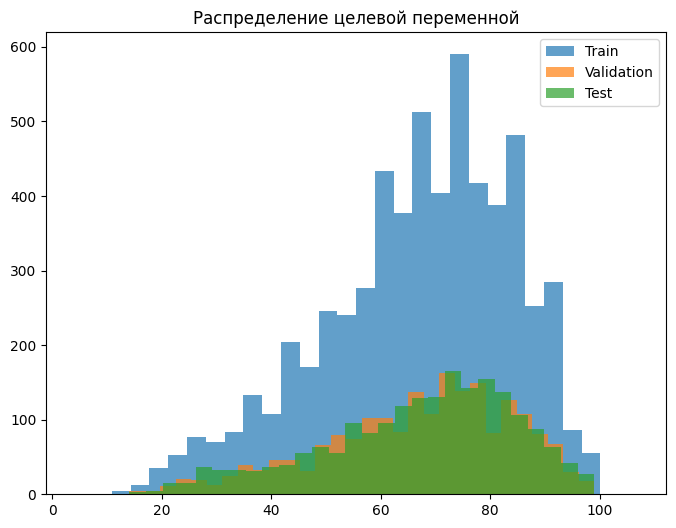

In [5]:
import matplotlib.pyplot as plt

# Проверка распределения целевой переменной
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=30, alpha=0.7, label='Train')
plt.hist(y_val, bins=30, alpha=0.7, label='Validation')
plt.hist(y_test, bins=30, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение целевой переменной')
plt.show()
